In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction
In this analysis, our goal is to explore and clean a wine attributes data set that suffers from a variety of data integrity and usability issues. We will perform a thorough EDA and perform appropriate data overview.

In [2]:
articles_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M4/M4_Data.csv")
articles_raw.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
articles_raw = articles_raw[articles_raw[' n_non_stop_words'] !=1042]

| Variables                     | Definition                            | Data type | Distribution | Correlation | Explanation                                                                        |
|-------------------------------|---------------------------------------|-----------|--------------|-------------|------------------------------------------------------------------------------------|
| title_subjectivity            | Title subjectivity                    | Numeric   | Right-Skewed  |  Non-Linear  | This variable represents the subjectivity of the title of the article on a scale of 0-1.              |
| title_sentiment_polarity      | Title polarity                        | Numeric   |  Close to normal  |  Non-Linear | This variable represents the polarity (positivity or negativity) of the title of the article on a scale of 0-1. |
| abs_title_subjectivity        | Absolute subjectivity level           | Numeric   |  Left-Skewed | Non-Linear | This variable represents the absolute level of subjectivity in the title of the article on a scale of 0-0.5. |
| abs_title_sentiment_polarity  | Absolute polarity level               | Numeric   |  Right-Skewed |   Non-Linear  | This variable represents the absolute level of polarity (positivity or negativity) in the title of the article on a scale of 0-1. |

- __Feature Selection:__  
'title_subjectivity' and 'title_sentiment_polarity' seems to have a weak distribution pattern with the shares, and the other two attributes are kind of correlated because the are the absolute value of the first two attributes. But they have less information, thus can be filtered.

# 3. Feature Selection / Dimensionality Reduction
Explain + present your feature selection / dimensionality work, including any Python code used as part of that process.


Principle Component Analysis
In this part we take all the numeric variables that has a certain distribution pattern with the response variable, and try to use PCA to reduce the dimension of the dataset. There are 36 numeric varibles selected, the others are filtered according to EDA process.  
After selecting the explanatory variables, we scale the data using StandardScaler so that PCA will not have a biased scaling problem.  
We can tell from the explained variance ratio chart below, the data can not be explained by few PCs, the line is following a smooth trend and does not have a clear elbow. 

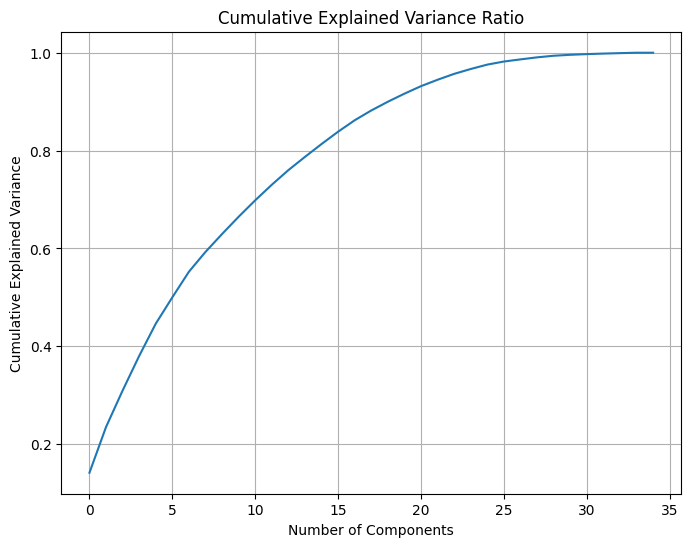

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

explanatory_variables=[" n_tokens_title", " n_tokens_content", " n_unique_tokens", ' n_non_stop_words'
    ,' n_non_stop_unique_tokens',' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',' LDA_00'
    , ' LDA_01', ' LDA_02',' LDA_03', ' LDA_04',' global_subjectivity',' global_sentiment_polarity'
    , ' global_rate_positive_words',' global_rate_negative_words', ' rate_positive_words'
    ,' avg_positive_polarity',' min_positive_polarity',' avg_negative_polarity',' max_negative_polarity'
    ,' title_subjectivity',' title_sentiment_polarity',' kw_min_min', ' kw_max_min', ' kw_avg_min'
    ,' kw_min_max', ' kw_max_max',' kw_max_avg',' kw_avg_avg',' self_reference_min_shares',' self_reference_max_shares'
    , ' self_reference_avg_sharess']

X = articles_raw[explanatory_variables].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


Under the consideration of explained data variance and dimensionality reduction, we will take PC1-PC12, which accounts for over 70% of data variance, as variables for the linear regression model. 

In [6]:
n_components = 12
X_pca_selected = X_pca[:, :n_components]
column_names = [f"PC{i}" for i in range(1, X_pca_selected.shape[1] + 1)]
pca_df = pd.DataFrame(data=X_pca_selected, columns=column_names)

sum_ratio=0
for i, ratio in enumerate(pca.explained_variance_ratio_, 1):
    sum_ratio+=ratio
    print(f"Principal Component 1 to {i}: Explained Variance Ratio = {sum_ratio:.4f}")
    if i == n_components:
        break

Principal Component 1 to 1: Explained Variance Ratio = 0.1418
Principal Component 1 to 2: Explained Variance Ratio = 0.2352
Principal Component 1 to 3: Explained Variance Ratio = 0.3097
Principal Component 1 to 4: Explained Variance Ratio = 0.3805
Principal Component 1 to 5: Explained Variance Ratio = 0.4464
Principal Component 1 to 6: Explained Variance Ratio = 0.5002
Principal Component 1 to 7: Explained Variance Ratio = 0.5525
Principal Component 1 to 8: Explained Variance Ratio = 0.5930
Principal Component 1 to 9: Explained Variance Ratio = 0.6296
Principal Component 1 to 10: Explained Variance Ratio = 0.6649
Principal Component 1 to 11: Explained Variance Ratio = 0.6985
Principal Component 1 to 12: Explained Variance Ratio = 0.7302


The PCA plot looks like this. It can be seen that there are some kind of distribution for these PCs.

In [ ]:
# Visualize the first two principal components
plt.figure(figsize=(8, 6))
for i in range(n_components-1):
    plt.scatter(X_pca_selected[:, i], X_pca_selected[:, i+1], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Scatter Plot')
    plt.grid(True)
plt.show()

The PC dataframe that we will be using for the linear regression model.

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.737104,-2.510506,-1.358342,0.325286,0.077308,1.102101,-1.458053,-1.342924,0.846737,-1.048621,-0.031015,0.812269
1,-0.134215,-3.132020,-0.331377,1.706055,0.977611,1.358674,-0.993982,-1.855174,0.533795,1.253065,0.052354,0.617263
2,-3.023224,-2.719049,0.642958,1.076610,0.548292,0.873372,-1.348276,0.623658,0.989865,-0.238478,0.686784,-0.563339
3,-0.399575,-2.538037,-1.077118,-0.323165,-0.206498,1.960781,-1.119312,0.122692,0.644804,-0.738213,-0.846769,1.284619
4,-1.339346,-1.973845,5.039220,-0.532032,0.362000,1.846468,-1.383433,1.275245,-0.217892,-1.219328,1.142097,-0.869138
...,...,...,...,...,...,...,...,...,...,...,...,...
39638,-0.421393,0.013971,0.218595,-0.244337,1.856481,0.123952,0.812527,1.123824,0.097633,-0.153342,1.288437,-0.965559
39639,-2.099213,1.439962,0.185961,-1.176494,-1.135046,-2.277060,-2.830524,-1.248971,-4.147607,2.013500,-2.190638,-2.917945
39640,0.164991,1.321842,-0.613996,-1.379826,-1.175796,-0.712299,-0.742888,0.370294,0.708387,0.303516,0.014529,-0.679859
39641,2.073448,-1.557691,-1.226392,-0.926002,0.037078,1.341470,1.566813,0.264193,-0.334673,1.241782,-0.908574,0.217931


# 4. Regression Model Evaluation 
Explain + present your linear regression model and discuss its 
accuracy. This section should include any Python code used to construction + evaluate your regression 
model.


# 5. Conclusions